In [56]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
# ML 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns
base_color = sns.color_palette()[0]
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv("AB_NYC_2019.csv")

In [58]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [59]:
# df.set_index("id", inplace = True)

In [60]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [61]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [62]:
df_knn = df[[
    'longitude', 'latitude' , 'price', 'number_of_reviews', 'minimum_nights'
    ]]


In [63]:
scaler = MinMaxScaler()
df_knn[df_knn.columns] = df_knn[df_knn.columns].astype(float)
df_knn[df_knn.columns] = scaler.fit_transform(df_knn[df_knn.columns])

In [64]:
pca = PCA()
pca.fit(df_knn)

PCA()

In [65]:
pca.explained_variance_ratio_

array([0.56808081, 0.24411459, 0.16096529, 0.01819963, 0.00863968])

In [66]:
pca = PCA(n_components=3)

In [67]:
pca.fit(df_knn)

PCA(n_components=3)

In [68]:
scores_pca = pca.transform(df_knn)

In [69]:
k_clusters = 3

In [70]:
results = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, random_state=40).fit(scores_pca)
    results.append(kmeans_pca.inertia_)

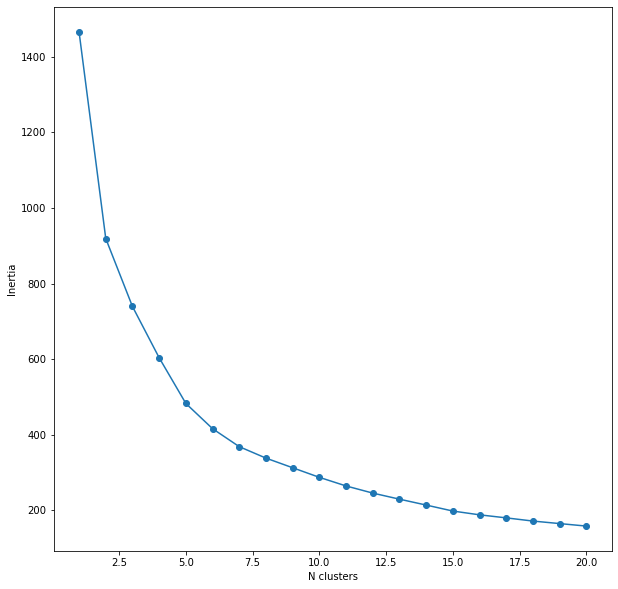

In [71]:
plt.figure(figsize=(10,10))
plt.plot(range(1,21), results, marker='o', linestyle='-')
plt.xlabel('N clusters')
plt.ylabel('Inertia')
plt.show()

In [72]:
# best 5 - 7 clusters
final_kmeans = KMeans(n_clusters=6, random_state=40)
final_kmeans.fit(scores_pca)

KMeans(n_clusters=6, random_state=40)

In [73]:
df_pca = pd.DataFrame(scores_pca)
df_pca["cluster"] = final_kmeans.labels_

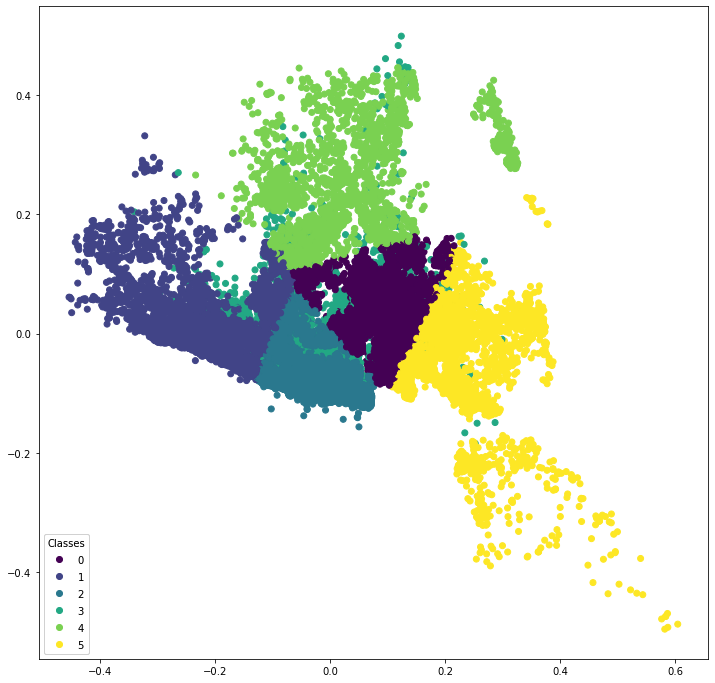

In [87]:

fig, ax = plt.subplots(figsize = (12,12))

scatter = ax.scatter(df_pca[0],df_pca[1], c = df_pca["cluster"])
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend)
plt.show()

In [75]:
df_result = pd.concat((df["price"], pd.DataFrame(df_pca["cluster"])), axis=1)

df_grouped = df_result.groupby("cluster")
round(df_grouped.mean(),)

,price
cluster,
0,120.0
1,127.0
2,225.0
3,134.0
4,97.0
5,121.0
